# Notebook for Batch Relaxation Testing of Status Economic Model
### Prepared by BlockScience

The purpose of this notebook is to test the lack of a guarantee that the tokens committed by the sender for message routing are present upon posting of a proof of a completed event.

In [1]:
# For displaying image files
from IPython.display import Image

### Import Model Configuration Object

#### Import Python Libraries for Analysis and Plotting

#### Output is the configuration dictionary containing

'N' = Number of Monte Carlo Runs, running multiple simulations of the same system.

'T' = Computer simulations run in discrete time. The length of the simulation in timesteps.

'M' = Dictionary of system parameter values being tested. Any parameter listed in the M dictionary may be swept over a range of values.

In [2]:
# Import configuration
from src.sim import run

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

import networkx as nx
sns.set_style("whitegrid")

i i
i j
i k
i p
i r
init routing table i [['i', 12, '0b1100', 0, '0b1100', 1], ['j', 7, '0b0111', 11, '0b', 1], ['k', 15, '0b1111', 3, '0b11', 1], ['p', 14, '0b1110', 2, '0b11', 1], ['r', 7, '0b0111', 11, '0b', 1]]
j i
j j
j k
j p
j r
init routing table j [['i', 12, '0b1100', 11, '0b', 1], ['j', 7, '0b0111', 0, '0b0111', 1], ['k', 15, '0b1111', 8, '0b', 1], ['p', 14, '0b1110', 9, '0b', 1], ['r', 7, '0b0111', 0, '0b0111', 1]]
k i
k j
k k
k p
k r
init routing table k [['i', 12, '0b1100', 3, '0b11', 1], ['j', 7, '0b0111', 8, '0b', 1], ['k', 15, '0b1111', 0, '0b1111', 1], ['p', 14, '0b1110', 1, '0b111', 1], ['r', 7, '0b0111', 8, '0b', 1]]
p i
p j
p k
p p
p r
init routing table p [['i', 12, '0b1100', 2, '0b11', 1], ['j', 7, '0b0111', 9, '0b', 1], ['k', 15, '0b1111', 1, '0b111', 1], ['p', 14, '0b1110', 0, '0b1110', 1], ['r', 7, '0b0111', 9, '0b', 1]]
r i
r j
r k
r p
r r
init routing table r [['i', 12, '0b1100', 11, '0b', 1], ['j', 7, '0b0111', 0, '0b0111', 1], ['k', 15, '0b1111', 8, '0b', 1]

### cadCAD Specification
A Partial State Update Block (PSUB) is a set of State Update Functions and Policy Functions such that State Update Functions in the set are independent from each other and Policies in the set are independent from each other and from the State Update Functions in the set. In other words, if a state variable is updated in a PSUB, its new value cannot impact the State Update Functions and Policy Functions in that PSUB - only those in the next PSUB. The partial state update block for the Status Network is implemented according to the specification below.

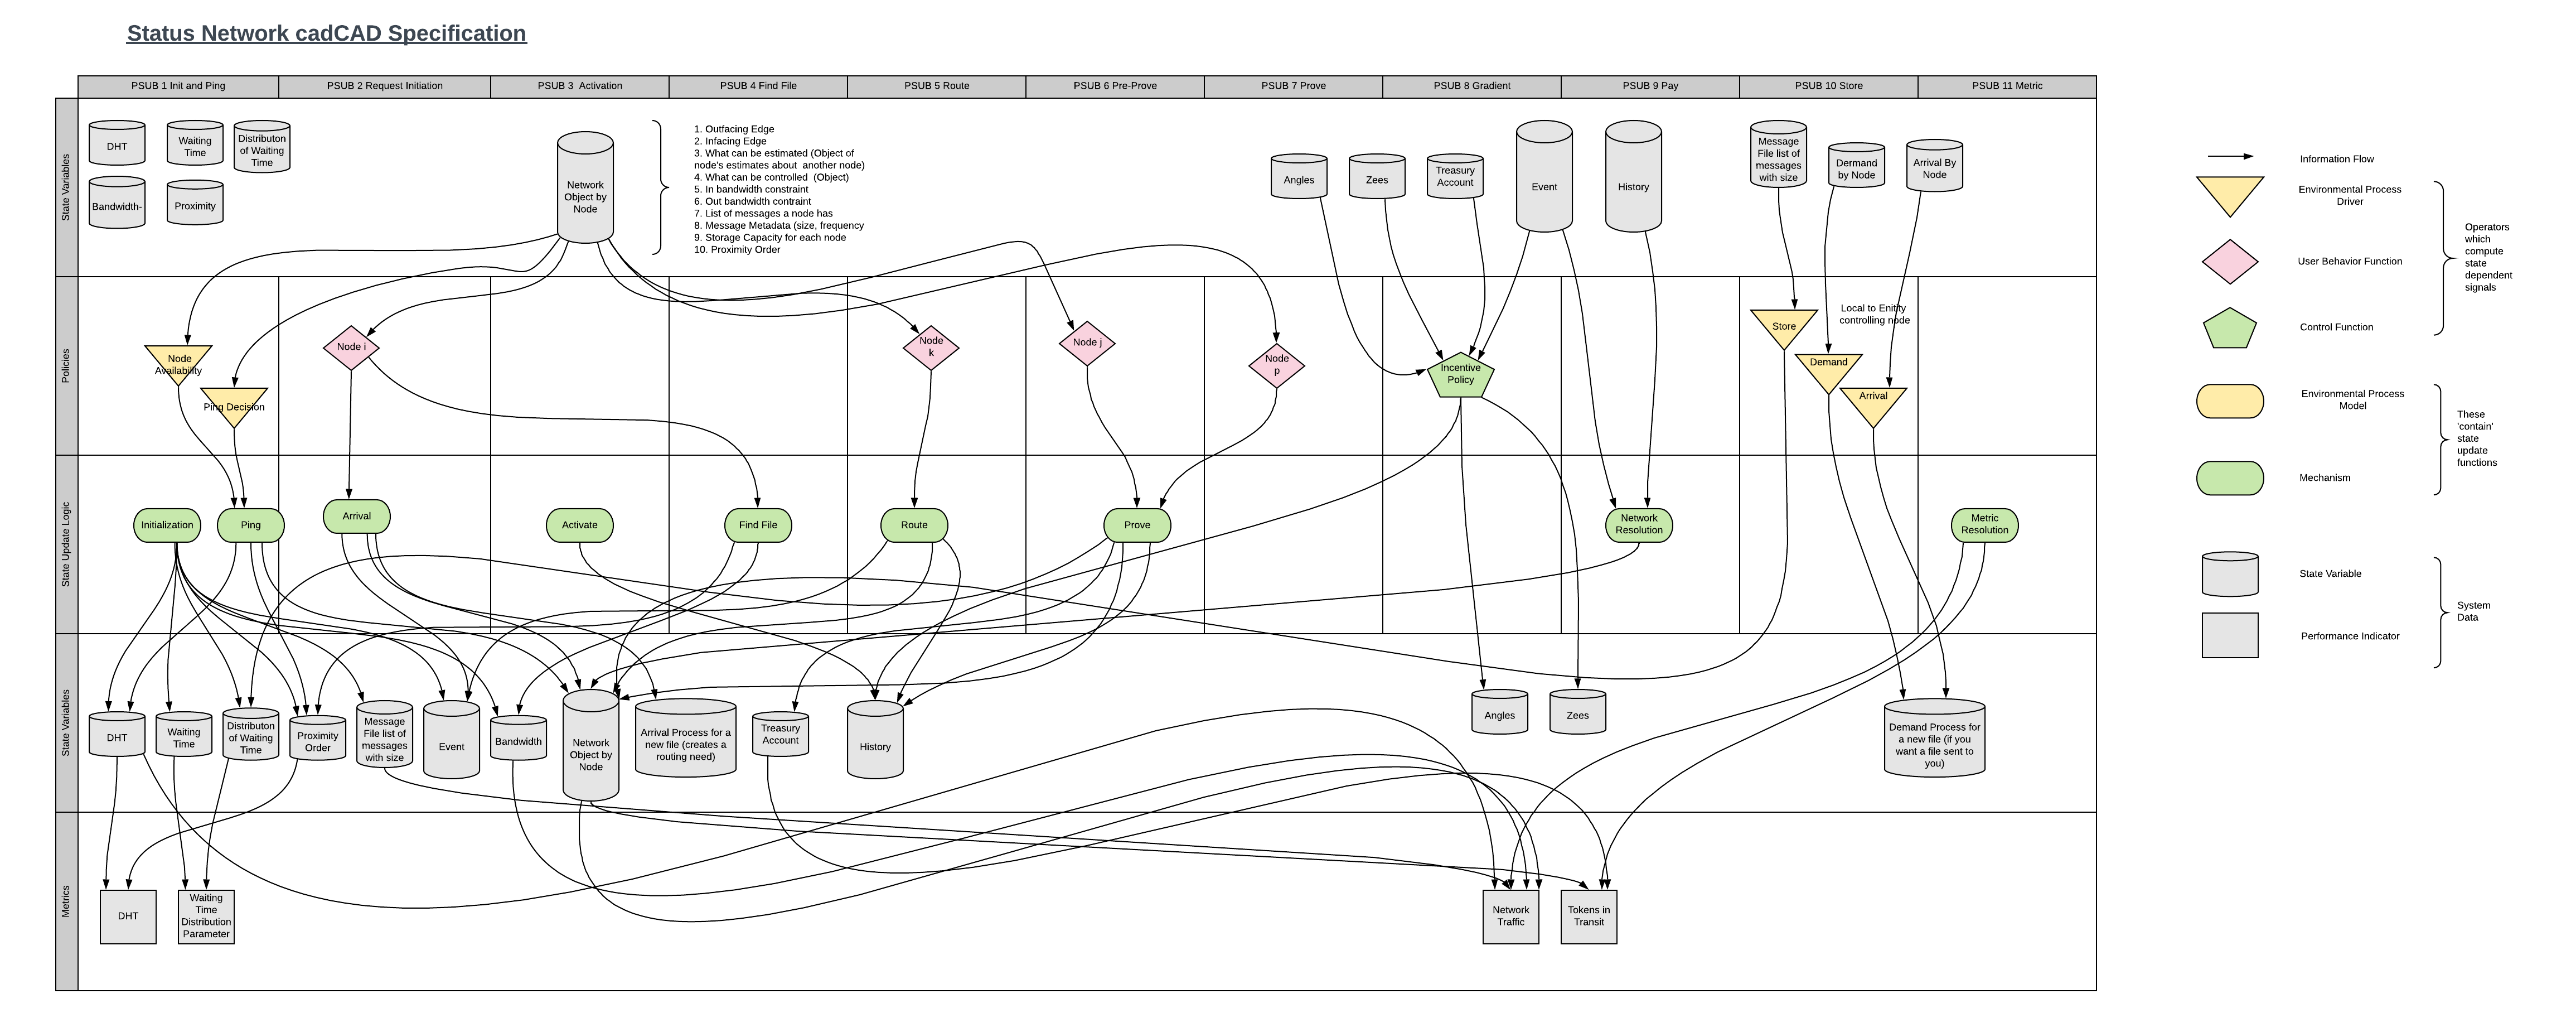

In [3]:
Image(filename='images\cadcad_spec.png')

### Run cadCAD Simulation
A Simulation execution produces a System Event Dataset and the Tensor Field applied to initial states used to create it.
Execute Simulation to produce the System Event Dataset, labeled "experiments"

In [4]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x000001BAAF841400>, <cadCAD.configuration.Configuration object at 0x000001BAAF841470>, <cadCAD.configuration.Configuration object at 0x000001BAB0B43470>]
Configurations: [<cadCAD.configuration.Configuration object at 0x000001BAAF841400>, <cadCAD.configuration.Configuration object at 0x000001BAAF841470>, <cadCAD.configuration.Configuration object at 0x000001BAB0B43470>]


### View Head of First Experiment Results

In [5]:
print(experiments.dataset[0].head())

    timestamp message_array  \
0  2020-01-01   [[0, 0, 0]]   
11 2020-01-01   [[0, 0, 0]]   
22 2020-01-01   [[0, 0, 0]]   
33 2020-01-01   [[0, 0, 0]]   
44 2020-01-01   [[0, 0, 0]]   

                                         message_list  \
0            [[None, None, None], [None, None, None]]   
11  [[None, None, None], [None, None, None], [1941...   
22  [[None, None, None], [None, None, None], [1941...   
33  [[None, None, None], [None, None, None], [1941...   
44  [[None, None, None], [None, None, None], [1941...   

                                   file_list                demand  \
0   [[None, None, None], [None, None, None]]                     0   
11  [[None, None, None], [None, None, None]]   [1941795584, 55, 1]   
22  [[None, None, None], [None, None, None]]   [1941796032, 69, 1]   
33  [[None, None, None], [None, None, None]]  [1941797888, 127, 1]   
44  [[None, None, None], [None, None, None]]   [1941796192, 74, 1]   

                arrival                          

In [6]:
experiments.dataset[0].network[44].nodes['i']

{'neighbor_estimate': {'j_avail_to_i': [0.9],
  'k_avail_to_i': array([0.81]),
  'p_avail_to_i': [0.6],
  'messages from k': 0,
  'messages from i': 0},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1941795584, 55, 1],
  [1941796032, 69, 1],
  [1941797888, 127, 1],
  [1941796192, 74, 1]],
 'current_capacity': 325,
 'inband': 1234,
 'outband': [140],
 'message_history': [[None, None, None], [None, None, None]],
 'control': {'j': 1,
  'k': 1,
  'p': 1,
  'r': 1,
  'k_P_0': 1,
  'j_P_0': 1,
  'k_P_1': 1,
  'j_P_1': 1,
  'k_P_2': 1,
  'j_P_2': 1,
  'k_P_3': 1,
  'j_P_3': 1,
  'i_A_0': 1,
  'j_A_0': 1,
  'k_A_0': 1,
  'p_A_0': 1,
  'r_A_0': 1,
  'i_A_1': 1,
  'j_A_1': 1,
  'k_A_1': 1,
  'p_A_1': 1,
  'r_A_1': 1,
  'i_A_2': 1,
  'j_A_2': 1,
  'k_A_2': 1,
  'p_A_2': 1,
  'r_A_2': 1,
  'i_A_3': 1,
  'j_A_3': 1,
  'k_A_3': 1,
  'p_A_3': 1,
  'r_A_3': 1},
 'wallet': 1000,
 'role': 'i',
 'id': 2,
 'routing_table': [['i', 12, '0b1100', 0, '0b1100', 1

In [7]:
first_key = max(experiments.dataset[0]['substep'])
last_time = max(experiments.dataset[0]['timestep'])
end_key = (len(experiments.dataset[0]) / max(experiments.dataset[0]['run']) -1) * max(experiments.dataset[0]['substep'])
twenty_time = max(experiments.dataset[0]['substep']) * 10 *2
# fifty_time =  max(experiments.dataset[0]['substep']) * 50

In [8]:
experiments.dataset[1].network[end_key].nodes

NodeView(('i', 'j', 'k', 'p', 'r', 'k_P_0', 'j_P_0', 'k_P_1', 'j_P_1', 'k_P_2', 'j_P_2', 'k_P_3', 'j_P_3', 'i_A_0', 'j_A_0', 'k_A_0', 'p_A_0', 'r_A_0', 'i_A_1', 'j_A_1', 'k_A_1', 'p_A_1', 'r_A_1', 'i_A_2', 'j_A_2', 'k_A_2', 'p_A_2', 'r_A_2', 'i_A_3', 'j_A_3', 'k_A_3', 'p_A_3', 'r_A_3'))

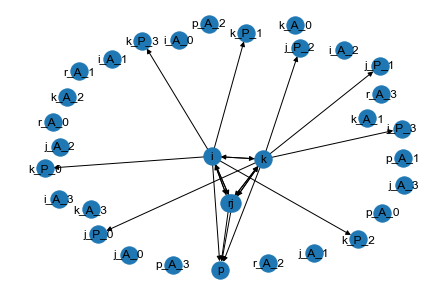

In [9]:
nx.draw(experiments.dataset[1].network[first_key], with_labels = True)
plt.show()

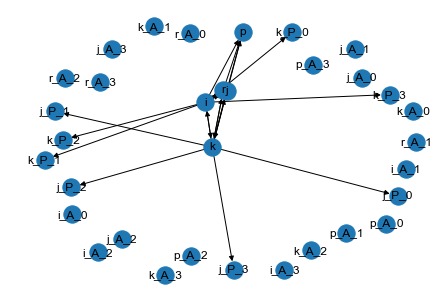

In [10]:
nx.draw(experiments.dataset[1].network[end_key], with_labels = True)
plt.show()

### View Head of Second Experiment Results

In [11]:
print(experiments.dataset[1].head())

    timestamp message_array  \
0  2020-01-01   [[0, 0, 0]]   
11 2020-01-01   [[0, 0, 0]]   
22 2020-01-01   [[0, 0, 0]]   
33 2020-01-01   [[0, 0, 0]]   
44 2020-01-01   [[0, 0, 0]]   

                                         message_list  \
0            [[None, None, None], [None, None, None]]   
11  [[None, None, None], [None, None, None], [1941...   
22  [[None, None, None], [None, None, None], [1941...   
33  [[None, None, None], [None, None, None], [1941...   
44  [[None, None, None], [None, None, None], [1941...   

                                   file_list                demand  \
0   [[None, None, None], [None, None, None]]                     0   
11  [[None, None, None], [None, None, None]]   [1941795520, 53, 1]   
22  [[None, None, None], [None, None, None]]   [1941794976, 36, 1]   
33  [[None, None, None], [None, None, None]]  [1941799456, 176, 1]   
44  [[None, None, None], [None, None, None]]   [1941795616, 56, 1]   

                arrival                          

Collect some keys for investigation at selected timesteps.

In [12]:
experiments.dataset[0].history[end_key].paid

In [13]:
experiments.dataset[0].history[end_key].not_paid

In [14]:
experiments.dataset[2].history[end_key].not_paid

In [15]:
experiments.dataset[0].network[end_key].nodes['j']

{'neighbor_estimate': {'storage from i': 7,
  'storage from k': 0,
  'messages from i': 0,
  'messages from k': 100},
 'storage_capacity': [500],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1941799456, 176, 3],
  [1941798176, 136, 1],
  [1941794592, 24, 1],
  [1941798016, 131, 1],
  [1941794720, 28, 1],
  [1941793920, 3, 1]],
 'current_capacity': 498,
 'inband': [400],
 'outband': [100],
 'message_history': [[None, None, None],
  [None, None, None],
  [1941795680, 58, 1],
  [0, 0, 80],
  [1941794080, 8, 2],
  [1941795808, 62, 1],
  [1941794048, 7, 1],
  [1941794720, 28, 1],
  [1941794592, 24, 1],
  [1941794272, 14, 1],
  [1941793888, 2, 1],
  [1941794400, 18, 1],
  [1941794176, 11, 2],
  [1941794144, 10, 1],
  [1941794976, 36, 1],
  [1941795232, 44, 1],
  [1941794208, 12, 2],
  [1941794112, 9, 1],
  [1941795648, 57, 1],
  [1941795744, 60, 1]],
 'control': {'i': 0,
  'k': 1,
  'p': 1,
  'r': 1,
  'k_P_0': 1,
  'j_P_0': 1,
  'k_P_1': 1,
  'j_P_1': 1,
  'k_P_2': 1,
 

### Distibution of Z-Routes Routes in Online Learning Model
#### Fake Route and Not Fake Route Classifer
Using the route dataset, we classify a route as fake or not. A classical classifier could make a distinct determination as to whether a route is definitively real or fake. Here, we make a weighted probabilistic determination on each route.

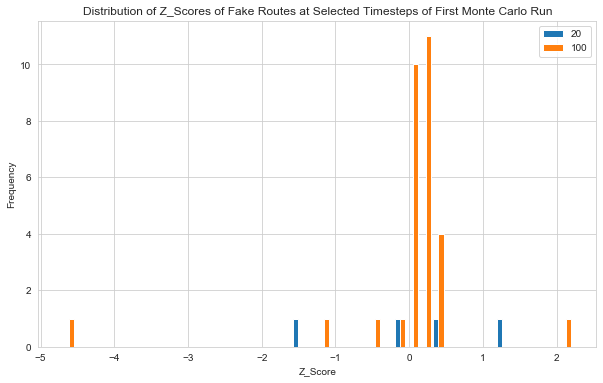

In [16]:
plt.figure(figsize=(10,6))
plt.xlabel('Z_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z_Scores of Fake Routes at Selected Timesteps of First Monte Carlo Run')
 # experiments.dataset[0]['f_hat'][fifty_time], \
plt.hist([experiments.dataset[0]['f_hat'][twenty_time],\
          experiments.dataset[0]['f_hat'][end_key]], bins = 40, label =['20',str(last_time)])
plt.legend()
plt.show()

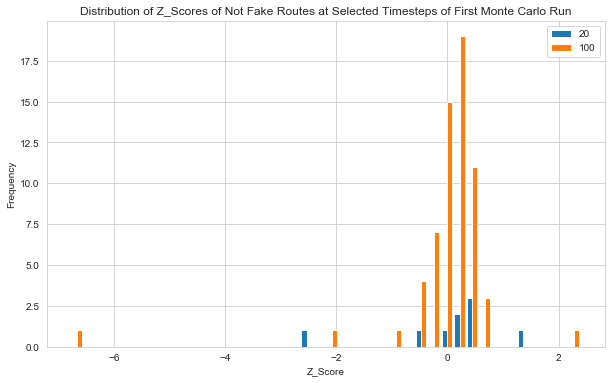

In [17]:
plt.figure(figsize=(10,6))
plt.xlabel('Z_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z_Scores of Not Fake Routes at Selected Timesteps of First Monte Carlo Run')
#experiments.dataset[0]['zees'][fifty_time], \
plt.hist([experiments.dataset[0]['zees'][twenty_time], \
          experiments.dataset[0]['zees'][end_key]], bins = 40, label =['20',str(last_time)])
plt.legend()
plt.show()

### Network Tasks as Roles

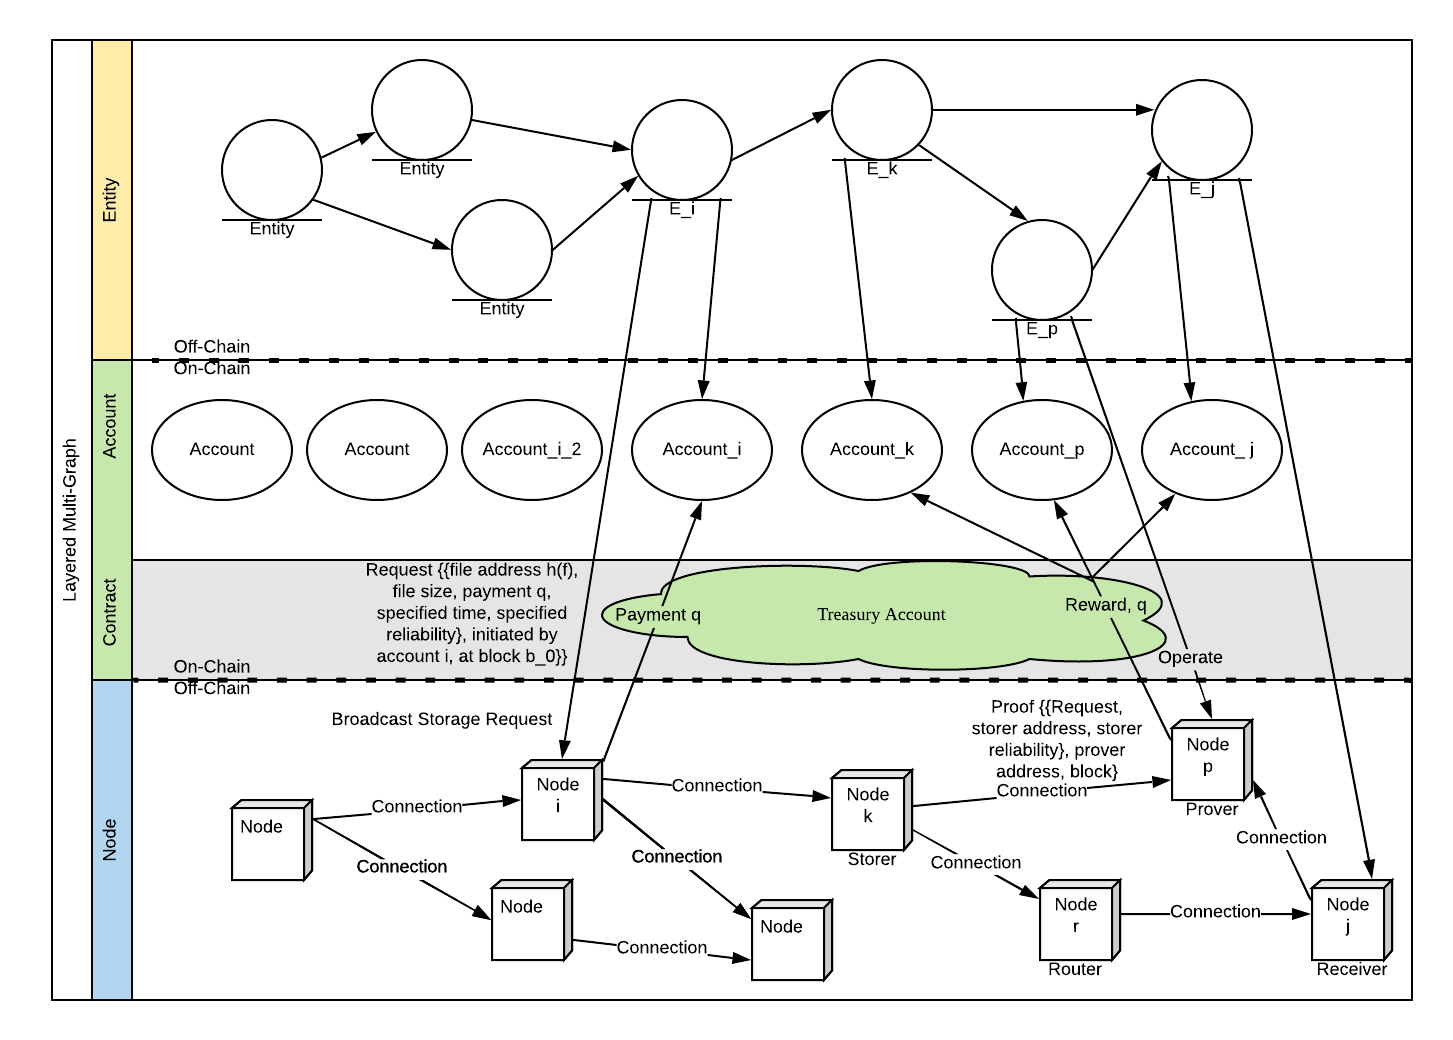

In [18]:
Image(filename='images\layers.png')

The tasks necessary to perform messaging within a provable decentralized system are:
1. 'i' is the sending role
2. 'k' is the storing role
3. 'r' is the routing role
4. 'j' is the receiving role
5. 'p' is the proving role

### Test Values: Starting Sender Wallet
Tokens escrowed by 'i' for each message is adjusted by the online learning model.

The adjusted escrowed tokens are distributed across roles via a set of two independent parameters:
1. 'route_allocation': % Distribution to Routing Nodes
2. 'store_allocation': % Distribution to Storing Nodes

Any remaining distribution amount is then allocated to the proving role, dependent upon the value of the other two.  

The allocation across roles for this set of tests is as follows:


| Test Case    | Starting i Wallet    | 
|:-------------:|:-------------:|
| **1**      | 1000      | 
| **2**      | 1500      |
| **3**      | 2000      |


### Tokens Held in Treasury Buffer

The Treasury is an account balance of SNT which is wholly controlled by the network. It contains the cumulative sum of removed escrow as tax for slower than expected routing and subsidies as payments for faster than expected routing. It also collects a separate penalty from a classifier for determining a fake route.

The following plots display the amount of tokens held in the treasury over the time of the simulation. The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

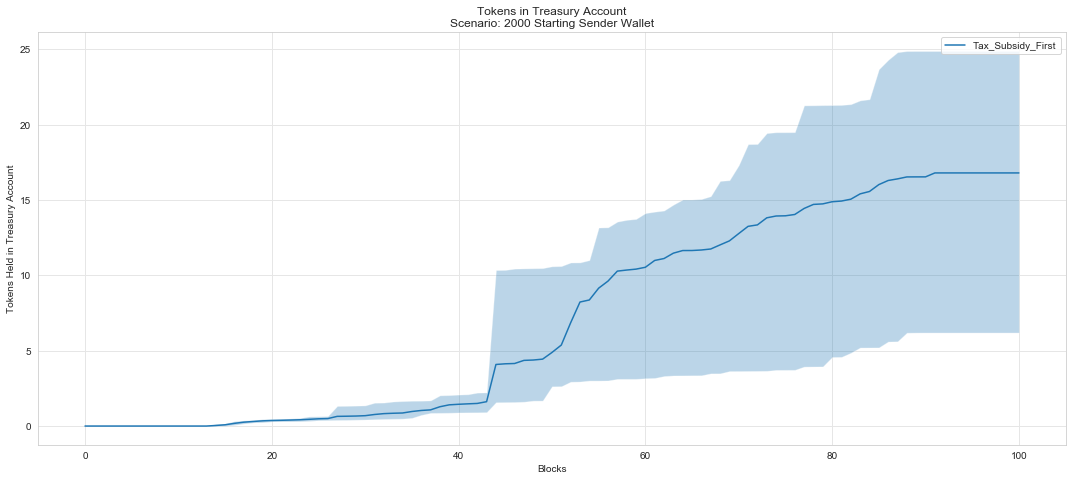

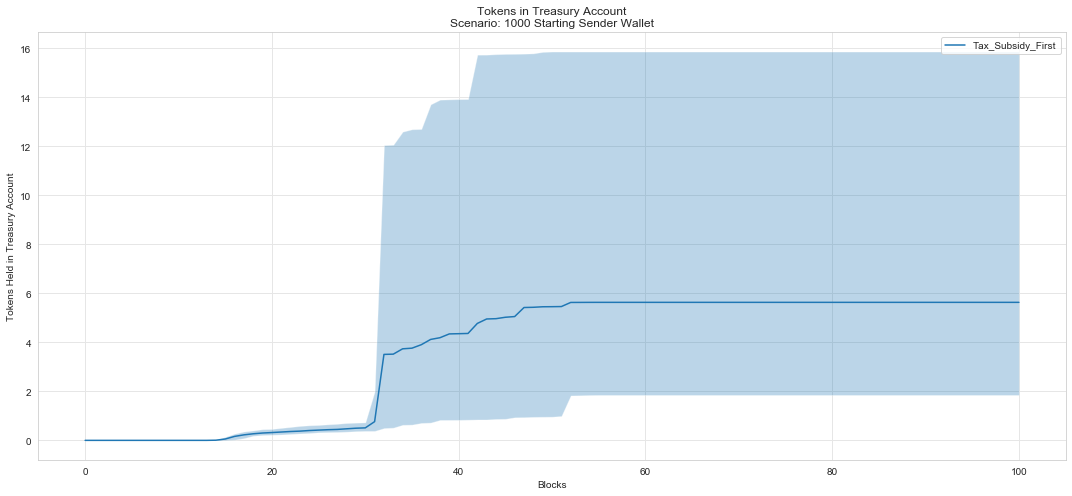

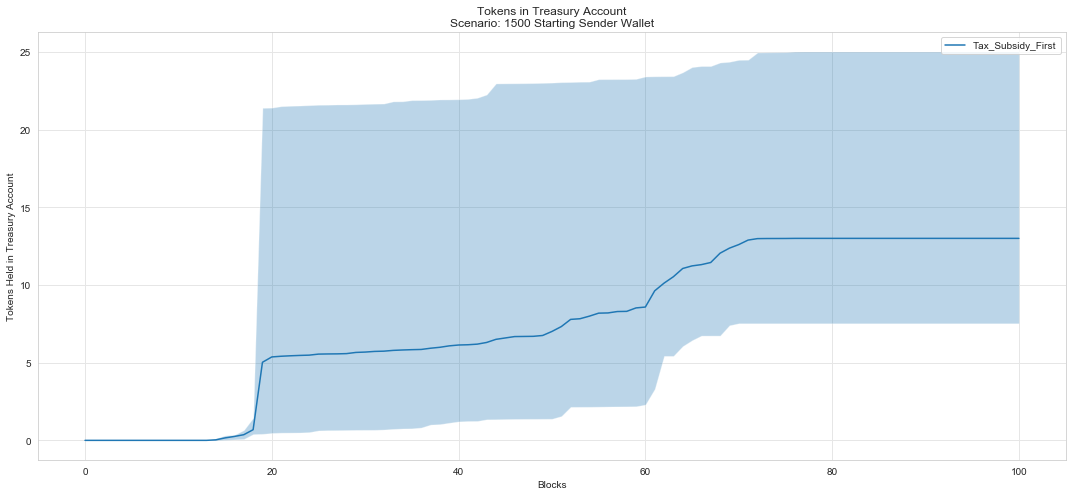

In [19]:
# experiments['AB_Test'] = experiments.driving_network_power_function.apply(lambda x: x['label'])
# sub_experiments = experiments.sort_values(by=['driving_function','demand_factor',
# 'exponential_minting_factor']).reset_index(drop=True)
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0
config_labels = ['Partitioned Subsidy','Bounded Minimum of Escrow and Tax Subsidy']

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    secondary_label = experiments.iloc[cc_idx]['route_allocation']
    cc_idx += len(sub_experiments)

    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df = df.groupby('timestep').agg({'treasury': ['min', 'mean', 'max']}).reset_index()
        
#         # named varying function
#         if experiment['xx_function']=='exponential_decay':
#             pass
# #         elif experiment['xx_function']=='random':
# #             pass
#         else:
#             continue
#         print(cc_label)
        plot_label = experiment['AB_Test']

        ax = axs
        title = 'Tokens in Treasury Account' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' # + str(secondary_label*100)  + ' % Route Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens Held in Treasury Account')
#         df.plot(x='timestep', y=('treasury','mean'), label=plot_label, ax=ax, legend=True)
        df.plot(x='timestep', y=('treasury','mean'),label = plot_label, ax=ax, legend=True)

        ax.fill_between(df.timestep, df[('treasury','min')], df[('treasury','max')], alpha=0.3)        
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

As expected, the store allocation does not materially effect the treasury buffer account. All test scenarios exhibit the similar curvature, variation, and values within acceptable ranges.

### Token Movement Across Roles

The following plots display the amount of tokens allocated to each role over the time of the simulation. The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

Note that funds are not directly distributed to the receiving task. The receiver role takes on the role of prover in this simulation and is allocated funds from the prover portion. When the receiver does not broadcast the proof according to stochastic process, controlled by the 'j_prove_likelihood' parameter, then the 'p' role is allocated those tokens.

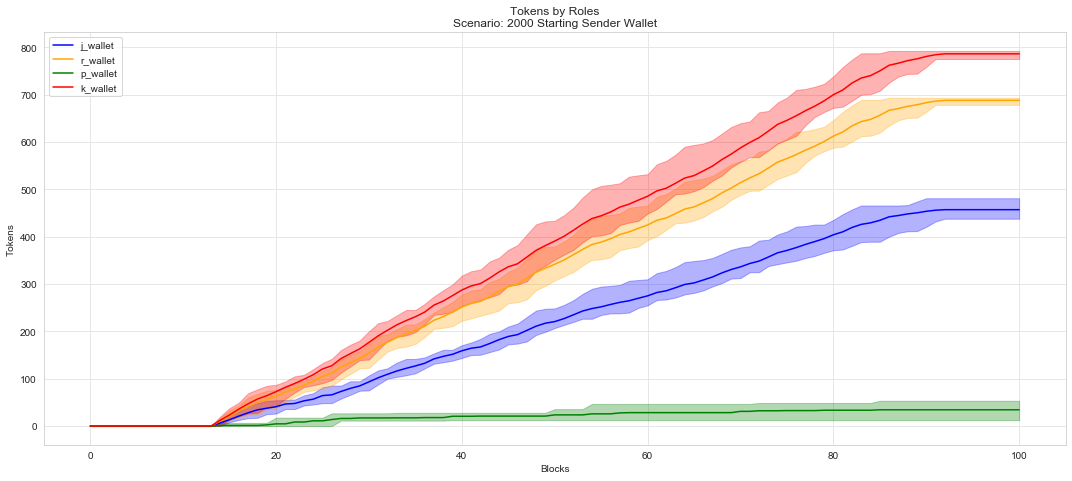

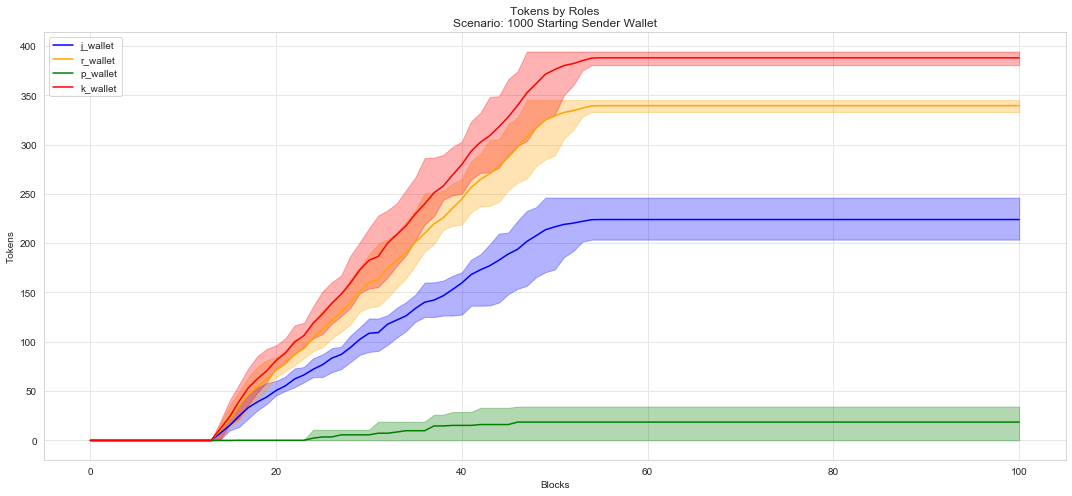

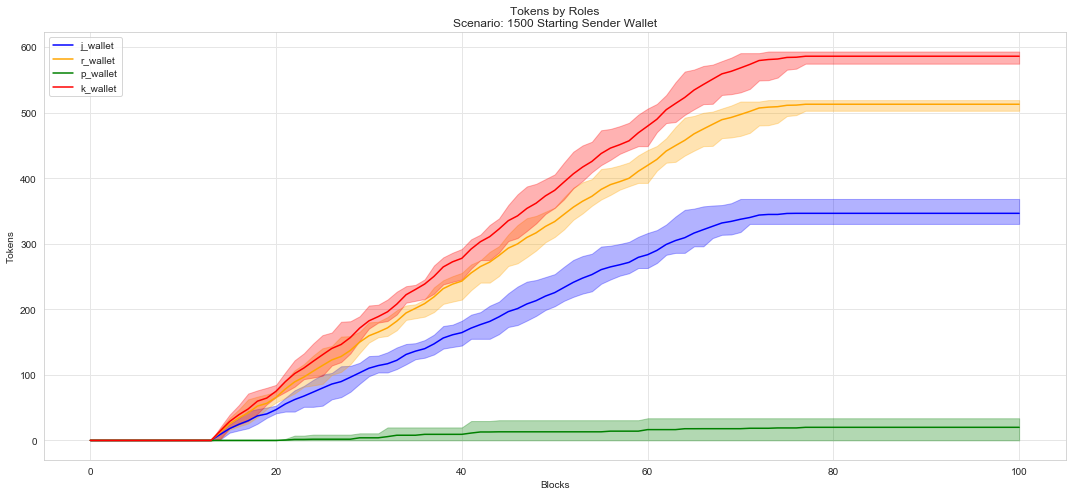

In [20]:
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    secondary_label = experiments.iloc[cc_idx]['store_allocation']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['j_wallet'] = df.network.apply(lambda x: np.array(x.nodes['j']['wallet']))
        df['r_wallet'] = df.network.apply(lambda x: np.array(x.nodes['r']['wallet']))
        df['p_wallet'] = df.network.apply(lambda x: np.array(x.nodes['p']['wallet']))
        df['k_wallet'] = df.network.apply(lambda x: np.array(x.nodes['k']['wallet']))

        df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        df['r_wallet'] = np.array(df.r_wallet,dtype = float)
        df['p_wallet'] = np.array(df.p_wallet,dtype = float)
        df['k_wallet'] = np.array(df.k_wallet,dtype = float)
        
        df_j = df.groupby('timestep').agg({'j_wallet': ['min', 'mean', 'max']}).reset_index()
        df_r = df.groupby('timestep').agg({'r_wallet': ['min', 'mean', 'max']}).reset_index()
        df_p = df.groupby('timestep').agg({'p_wallet': ['min', 'mean', 'max']}).reset_index()
        df_k = df.groupby('timestep').agg({'k_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['AB_Test']
        ax = axs
        title = 'Tokens by Roles' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' # + str(secondary_label*100)  + ' % Store Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

        ax.plot(df_j.timestep, df_j['j_wallet']['mean'],color = colors[0], label='j_wallet')
        ax.plot(df_r.timestep, df_r['r_wallet']['mean'],color = colors[1],label='r_wallet')
        ax.plot(df_p.timestep, df_p['p_wallet']['mean'],color = colors[2],label='p_wallet')
        ax.plot(df_k.timestep, df_k['k_wallet']['mean'],color = colors[3],label='k_wallet')

        ax.legend()

        ax.fill_between(df_j.timestep, df_j[('j_wallet','min')], df_j[('j_wallet','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        
        ax.fill_between(df_r.timestep, df_r[('r_wallet','min')], df_r[('r_wallet','max')], alpha=0.3 ,color = colors[1],label='r_wallet')        
        ax.fill_between(df_p.timestep, df_p[('p_wallet','min')], df_p[('p_wallet','max')], alpha=0.3 ,color = colors[2],label='p_wallet')        
        ax.fill_between(df_k.timestep, df_k[('k_wallet','min')], df_k[('k_wallet','max')], alpha=0.3 ,color = colors[3],label='k_wallet')        
         
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

Routing tokens in 'r' wallet are unaffected by the variation in storage allocation. We see a linear scaling effect where the 'k' role token holdings increase with storage allocation, to the detriment of the receiving and proving roles who recieve a smaller portion of the distribution.

The results offer global insight into how funds are allocated as well as how to respond and react when changes are necessary. 

### Create Persona Class
The above result is role-based, dimensioned across the activity in the network.

A coordinate transformation can now be performed to develop sub-populations describing activity across roles. 
The notion of a individualized participant can be defined as a persona described through two vectors.

$$ Persona  = (\overrightarrow{\rho}, \overrightarrow{\sigma})$$

Where role vector, $\overrightarrow{\rho}$, defines how the participant apportions its activity among the roles.

$$\overrightarrow{\rho} = \left[\begin{array}{ccccc} \rho_i & \rho_k & \rho_r & \rho_j & \rho_p \end{array} \right]$$

and, where the share vector, $\overrightarrow{\sigma}$, defines the share of the total activity across all participants that the persona is contributing. 

$$ \overrightarrow{\sigma} = \left[ \begin{array}{c} \sigma_i \\  \sigma_k \\ \sigma_r \\ \sigma_j \\ \sigma_p \\ \end{array} \right] $$

The role vector for each persona captures the whole of its participation in the network.
For each persona:

$$ \sum_{role}{ \rho_{role}} = 1 $$


Not expected to be the case, but if all personas were defined to encapsulate all network activity for a given role, then:

$$ \sum_{persona}{ \rho_{role}} = 1 $$


A vertical slice across the roles, with a $\overrightarrow{\sigma} =1$ , represents 100% of the network activity for that role:
$$ Persona  = (\overrightarrow{\rho}, 1)$$

This would be an individual persona, but a method for establishing a baseline from which to partition.

In [21]:
class Persona(): #args
    """
    Persona class for defining the weighted distribution across roles that an entity may play
    """  
    def __init__(self, sending_role, storing_role, routing_role, receiving_role, proving_role=None):
        """
        Role vector unitized to 1
        """        
        self.sending_role =  sending_role
        self.storing_role = storing_role
        self.routing_role = routing_role
        self.receiving_role = receiving_role
        
        # Use proving role for remainder of role apportioning if not adding to 1
        if proving_role is None:
            self.proving_role = 1 - (sending_role + receiving_role + routing_role + storing_role)
        else:
            self.proving_role = proving_role
        
    def apply_share(self, sending_share, storing_share, routing_share, receiving_share, proving_share):
        """
        Apply market share by role vector across role vector
        """  
        self.sending_role *=  sending_share
        self.storing_role *= storing_share
        self.routing_role *= routing_share
        self.receiving_role *= receiving_share
        self.proving_role *= proving_share
        
    def __str__(self):
        """
        Print all attributes of an event
        """
        return str(self.__class__) + ": " + str(self.__dict__)   

####  Persona 1: Control, uniform distribution of activity, total role share
Control persona for establishing baseline persona and applicability of method. This control persona represents the sum of all network activity spread evenly across roles.

$ Persona  = (\overrightarrow{\rho}, 1)$

$\overrightarrow{\rho} = \left[\begin{array}{ccccc} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{array} \right]$

| Send Activity    |  Store Activity | Route Activity     |  Receive Activity |  Prove Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|20%    | 20%      | 20%      |20%      |20%      |

$\overrightarrow{\sigma} = \left[\begin{array}{ccccc} 1 & 1 & 1 & 1 & 1 \end{array} \right]$

| Send Share    |  Store Share | Route Share     |  Receive Share |  Prove Share  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|100%    | 100%      | 100%      |100%      |100%      |

The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

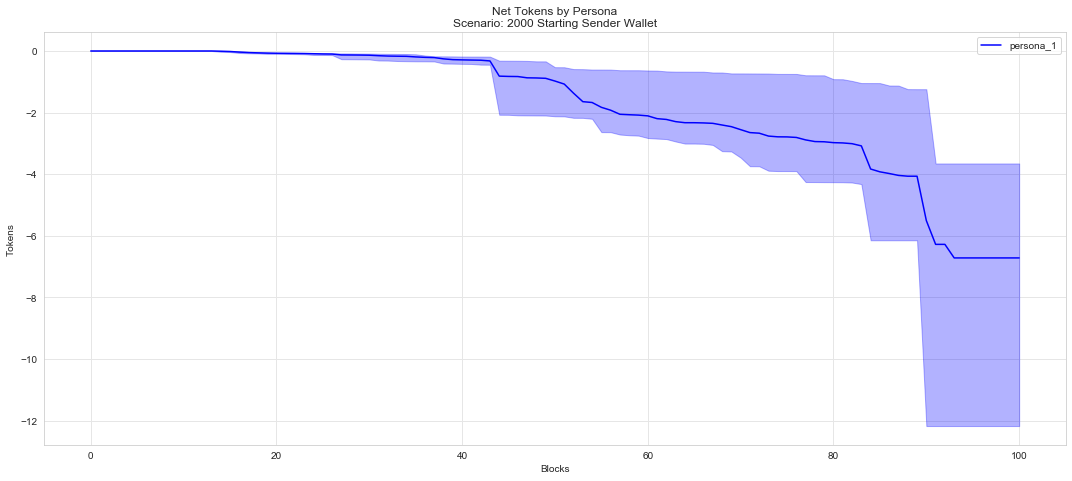

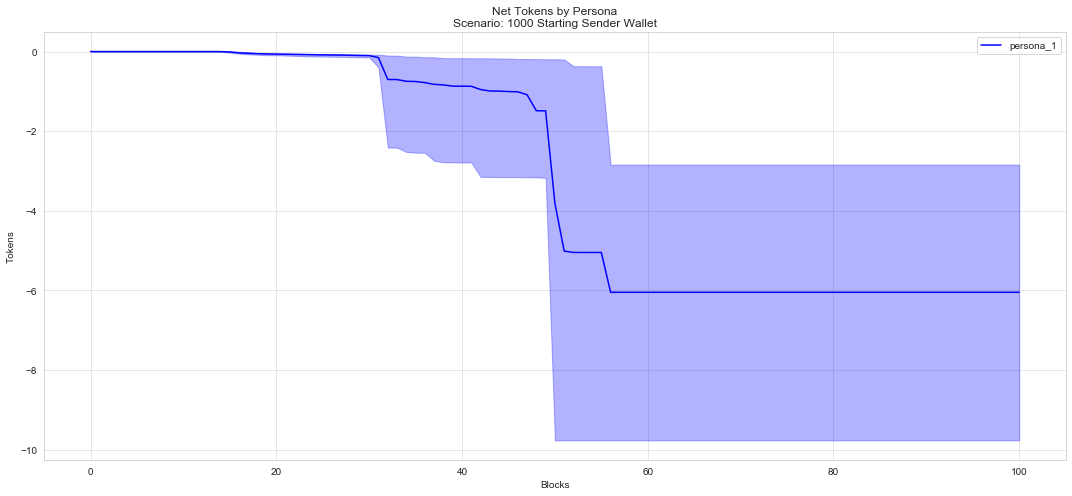

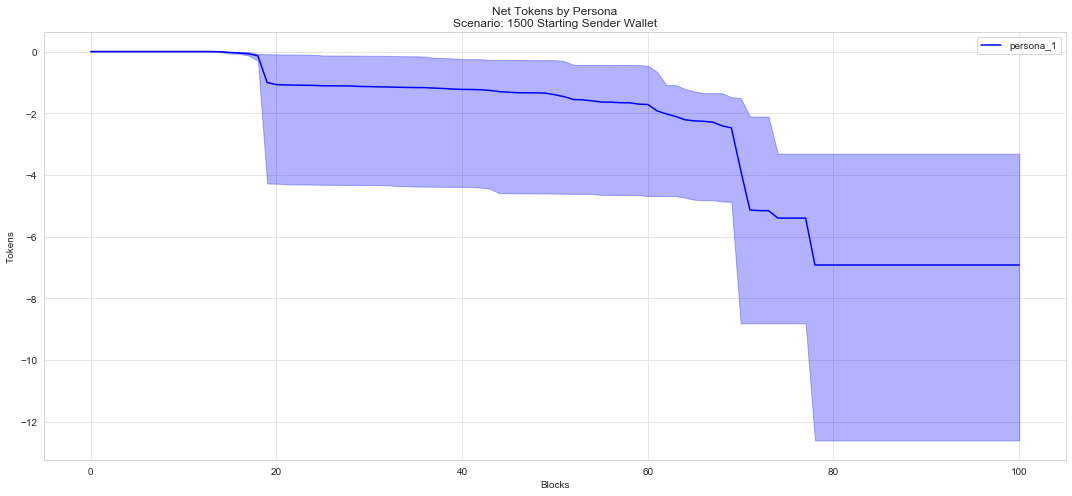

In [22]:
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)

persona_1 = Persona(0.2,0.2,0.2,0.2,0.2)
# persona_1.apply_share(0.2,0.2,0.2, 0.2,0.2) 

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['j_wallet'] = df.network.apply(lambda x: np.array(x.nodes['j']['wallet']))
        df['r_wallet'] = df.network.apply(lambda x: np.array(x.nodes['r']['wallet']))
        df['p_wallet'] = df.network.apply(lambda x: np.array(x.nodes['p']['wallet']))
        df['k_wallet'] = df.network.apply(lambda x: np.array(x.nodes['k']['wallet']))
        df['i_wallet'] = df.network.apply(lambda x: np.array(x.nodes['i']['wallet']))

        df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        df['r_wallet'] = np.array(df.r_wallet,dtype = float)
        df['p_wallet'] = np.array(df.p_wallet,dtype = float)
        df['k_wallet'] = np.array(df.k_wallet,dtype = float)
        df['i_wallet'] = np.array(df.i_wallet,dtype = float)

#         df['persona_1'] = 
        
        df['persona_1'] = df.j_wallet * persona_1.receiving_role + df.r_wallet * persona_1.routing_role + df.k_wallet * persona_1.storing_role\
                    + df.p_wallet * persona_1.proving_role + df.i_wallet * persona_1.sending_role - df.i_wallet[0] * persona_1.sending_role
        
        
        df_persona_1 = df.groupby('timestep').agg({'persona_1': ['min', 'mean', 'max']}).reset_index()
#         df_r = df.groupby('timestep').agg({'r_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_p = df.groupby('timestep').agg({'p_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_k = df.groupby('timestep').agg({'k_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['AB_Test']
        ax = axs
        title = 'Net Tokens by Persona' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' #+ str(secondary_label*100)  + ' % Route Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

        ax.plot(df_persona_1.timestep, df_persona_1['persona_1']['mean'],color = colors[0], label='persona_1')
#         ax.plot(df_r.timestep, df_r['r_wallet']['mean'],color = colors[1],label='r_wallet')
#         ax.plot(df_p.timestep, df_p['p_wallet']['mean'],color = colors[2],label='p_wallet')
#         ax.plot(df_k.timestep, df_k['k_wallet']['mean'],color = colors[3],label='k_wallet')

        ax.legend()

        ax.fill_between(df_persona_1.timestep, df_persona_1[('persona_1','min')], df_persona_1[('persona_1','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        
#         ax.fill_between(df_r.timestep, df_r[('r_wallet','min')], df_r[('r_wallet','max')], alpha=0.3 ,color = colors[1],label='r_wallet')        
#         ax.fill_between(df_p.timestep, df_p[('p_wallet','min')], df_p[('p_wallet','max')], alpha=0.3 ,color = colors[2],label='p_wallet')        
#         ax.fill_between(df_k.timestep, df_k[('k_wallet','min')], df_k[('k_wallet','max')], alpha=0.3 ,color = colors[3],label='k_wallet')        
         
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

Sending role would be initially bootstrapping the treasury buffer, thus the initial negative token flow. The persona is participating equally across roles, so it participates in the negative token flows (sending role) and positive token flows (storing, routing, proving roles). After the initial phase, the persona has a relatively neutral token flow. 

#### Persona 2: Uniform distribution of activity with uniform role share
Next, we introduce the effect of the role share vector, while still maintaining the uniform spread across role activity.

$ Persona  = (\overrightarrow{\rho}, \overrightarrow{\sigma})$

$\overrightarrow{\rho} = \left[\begin{array}{ccccc} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{array} \right]$

| Send Activity    |  Store Activity | Route Activity     |  Receive Activity |  Prove Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|20%    | 20%      | 20%      |20%      |20%      |

$\overrightarrow{\sigma} = \left[\begin{array}{ccccc} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{array} \right]$

| Send Share    |  Store Share | Route Share     |  Receive Share |  Prove Share  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|20%    | 20%      | 20%      |20%      |20%      |

The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

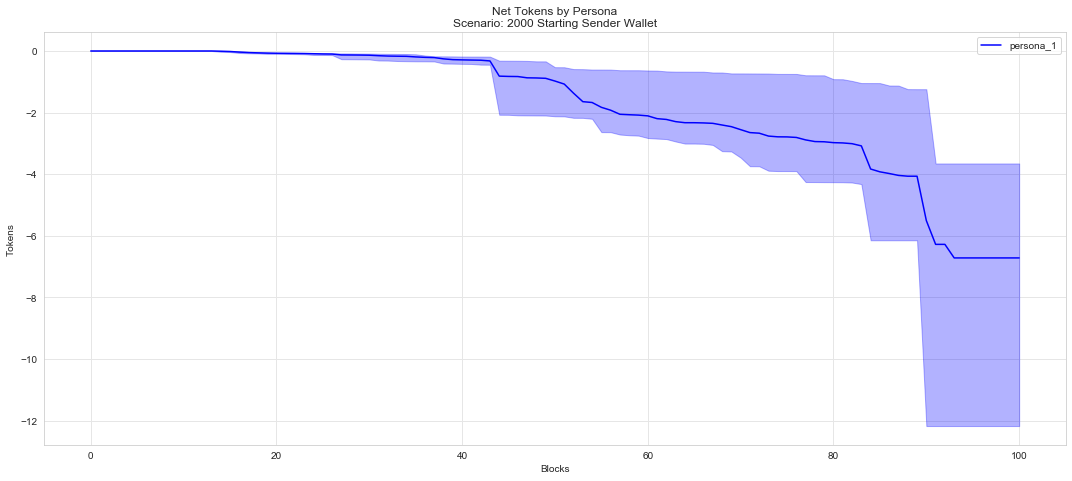

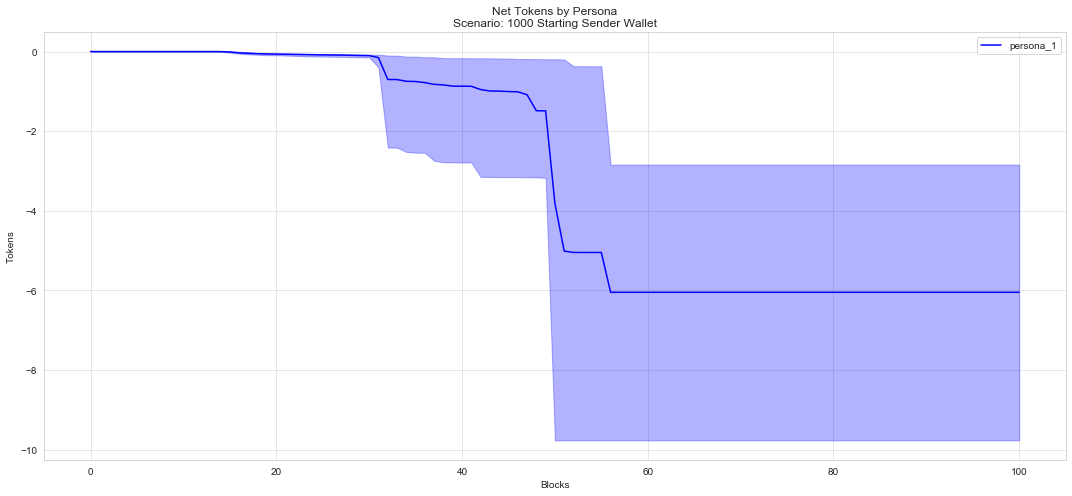

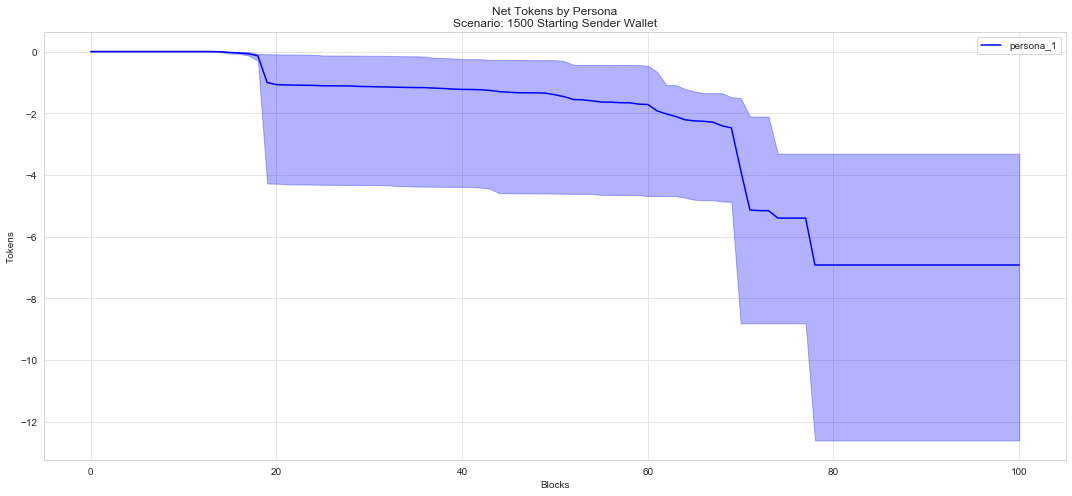

In [23]:
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)

persona_2 = Persona(0.2,0.2,0.2,0.2,0.2)
persona_2.apply_share(0.2,0.2,0.2, 0.2,0.2) 

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['j_wallet'] = df.network.apply(lambda x: np.array(x.nodes['j']['wallet']))
        df['r_wallet'] = df.network.apply(lambda x: np.array(x.nodes['r']['wallet']))
        df['p_wallet'] = df.network.apply(lambda x: np.array(x.nodes['p']['wallet']))
        df['k_wallet'] = df.network.apply(lambda x: np.array(x.nodes['k']['wallet']))
        df['i_wallet'] = df.network.apply(lambda x: np.array(x.nodes['i']['wallet']))

        df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        df['r_wallet'] = np.array(df.r_wallet,dtype = float)
        df['p_wallet'] = np.array(df.p_wallet,dtype = float)
        df['k_wallet'] = np.array(df.k_wallet,dtype = float)
        df['i_wallet'] = np.array(df.i_wallet,dtype = float)

#         df['persona_1'] = 
        
        df['persona_1'] = df.j_wallet * persona_1.receiving_role + df.r_wallet * persona_1.routing_role + df.k_wallet * persona_1.storing_role\
                    + df.p_wallet * persona_1.proving_role + df.i_wallet * persona_1.sending_role - df.i_wallet[0] * persona_1.sending_role
        
        
        df_persona_1 = df.groupby('timestep').agg({'persona_1': ['min', 'mean', 'max']}).reset_index()
#         df_r = df.groupby('timestep').agg({'r_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_p = df.groupby('timestep').agg({'p_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_k = df.groupby('timestep').agg({'k_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['AB_Test']
        ax = axs
        title = 'Net Tokens by Persona' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' #+ str(secondary_label*100)  + ' % Route Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

        ax.plot(df_persona_1.timestep, df_persona_1['persona_1']['mean'],color = colors[0], label='persona_1')
#         ax.plot(df_r.timestep, df_r['r_wallet']['mean'],color = colors[1],label='r_wallet')
#         ax.plot(df_p.timestep, df_p['p_wallet']['mean'],color = colors[2],label='p_wallet')
#         ax.plot(df_k.timestep, df_k['k_wallet']['mean'],color = colors[3],label='k_wallet')

        ax.legend()

        ax.fill_between(df_persona_1.timestep, df_persona_1[('persona_1','min')], df_persona_1[('persona_1','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        
#         ax.fill_between(df_r.timestep, df_r[('r_wallet','min')], df_r[('r_wallet','max')], alpha=0.3 ,color = colors[1],label='r_wallet')        
#         ax.fill_between(df_p.timestep, df_p[('p_wallet','min')], df_p[('p_wallet','max')], alpha=0.3 ,color = colors[2],label='p_wallet')        
#         ax.fill_between(df_k.timestep, df_k[('k_wallet','min')], df_k[('k_wallet','max')], alpha=0.3 ,color = colors[3],label='k_wallet')        
         
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

We see that applying the share vector over the control role vector is a scalar operation that scales the variation and net effects accordingly.

####  Persona 3: Control, weighted distribution of activity, full of share of activity by role

Now we introduce variation to the distribution of activity the persona plays across roles. Here, the persona plays less of sending role and participates greater in storing and routing.

$ Persona  = (\overrightarrow{\rho}, 1)$

$\overrightarrow{\rho} = \left[\begin{array}{ccccc} 0.05 & 0.3 & 0.25 & 0.2 & 0.2 \end{array} \right]$

| Send Activity    |  Store Activity | Route Activity     |  Receive Activity |  Prove Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|5%    | 30%      | 25%      |20%      |20%      |

$\overrightarrow{\sigma} = \left[\begin{array}{ccccc} 1 & 1 & 1 & 1 & 1 \end{array} \right]$

| Send Share    |  Store Share | Route Share     |  Receive Share |  Prove Share  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|100%    | 100%      | 100%      |100%      |100%      |

The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

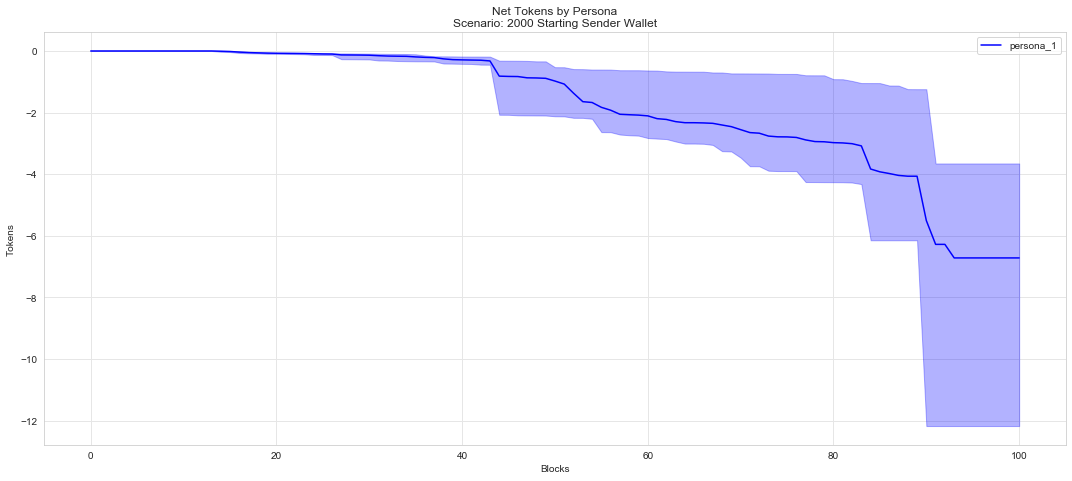

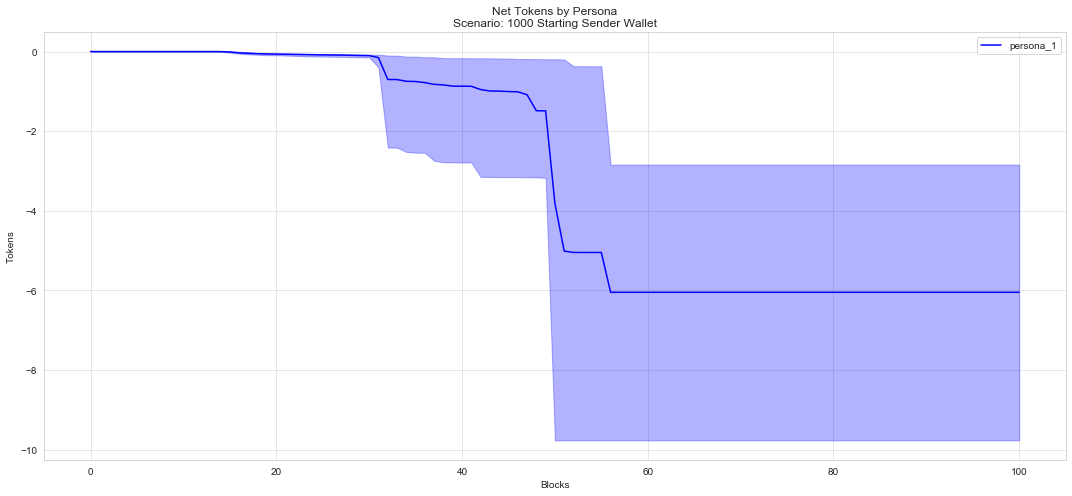

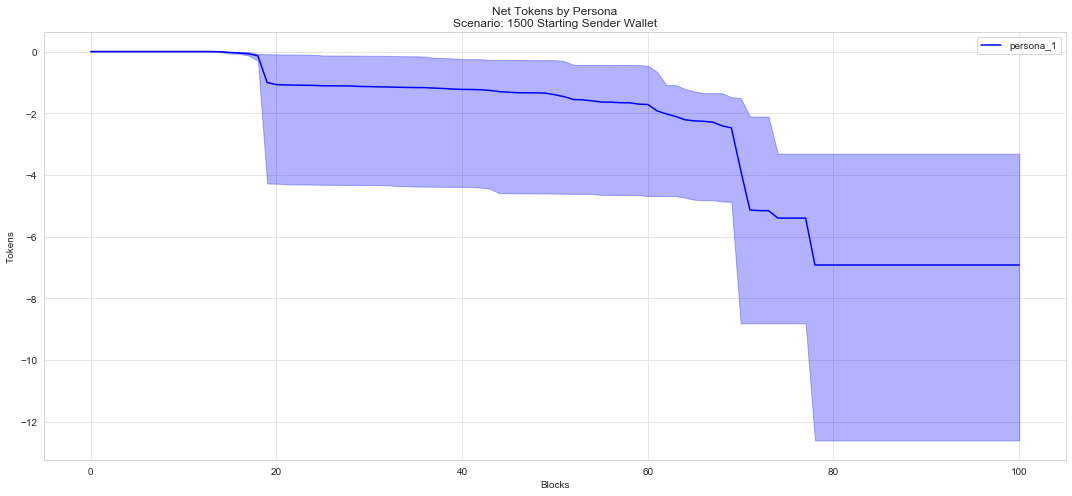

In [24]:
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)
# sending_role, storing_role, routing_role, receiving_role, proving_role
persona_3 = Persona(0.05,0.3,0.25,0.2,0.2)
# persona_3.apply_share(0.2,0.2,0.2, 0.2,0.2) 

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['j_wallet'] = df.network.apply(lambda x: np.array(x.nodes['j']['wallet']))
        df['r_wallet'] = df.network.apply(lambda x: np.array(x.nodes['r']['wallet']))
        df['p_wallet'] = df.network.apply(lambda x: np.array(x.nodes['p']['wallet']))
        df['k_wallet'] = df.network.apply(lambda x: np.array(x.nodes['k']['wallet']))
        df['i_wallet'] = df.network.apply(lambda x: np.array(x.nodes['i']['wallet']))

        df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        df['r_wallet'] = np.array(df.r_wallet,dtype = float)
        df['p_wallet'] = np.array(df.p_wallet,dtype = float)
        df['k_wallet'] = np.array(df.k_wallet,dtype = float)
        df['i_wallet'] = np.array(df.i_wallet,dtype = float)

#         df['persona_1'] = 
        
        df['persona_1'] = df.j_wallet * persona_1.receiving_role + df.r_wallet * persona_1.routing_role + df.k_wallet * persona_1.storing_role\
                    + df.p_wallet * persona_1.proving_role + df.i_wallet * persona_1.sending_role - df.i_wallet[0] * persona_1.sending_role
        
        
        df_persona_1 = df.groupby('timestep').agg({'persona_1': ['min', 'mean', 'max']}).reset_index()
#         df_r = df.groupby('timestep').agg({'r_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_p = df.groupby('timestep').agg({'p_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_k = df.groupby('timestep').agg({'k_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['AB_Test']
        ax = axs
        title = 'Net Tokens by Persona' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' #+ str(secondary_label*100)  + ' % Route Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

        ax.plot(df_persona_1.timestep, df_persona_1['persona_1']['mean'],color = colors[0], label='persona_1')
#         ax.plot(df_r.timestep, df_r['r_wallet']['mean'],color = colors[1],label='r_wallet')
#         ax.plot(df_p.timestep, df_p['p_wallet']['mean'],color = colors[2],label='p_wallet')
#         ax.plot(df_k.timestep, df_k['k_wallet']['mean'],color = colors[3],label='k_wallet')

        ax.legend()

        ax.fill_between(df_persona_1.timestep, df_persona_1[('persona_1','min')], df_persona_1[('persona_1','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        
#         ax.fill_between(df_r.timestep, df_r[('r_wallet','min')], df_r[('r_wallet','max')], alpha=0.3 ,color = colors[1],label='r_wallet')        
#         ax.fill_between(df_p.timestep, df_p[('p_wallet','min')], df_p[('p_wallet','max')], alpha=0.3 ,color = colors[2],label='p_wallet')        
#         ax.fill_between(df_k.timestep, df_k[('k_wallet','min')], df_k[('k_wallet','max')], alpha=0.3 ,color = colors[3],label='k_wallet')        
         
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

We see that reduced participation in sending allows the persona to act more heavily weighted as a prosumer in the network and have sustained positive gains in token holdings. 

####  Persona 4: Control, weighted distribution of activity with uniform distibution of role share

Next, we take the persona with this persona with less of sending role and greater in storing and routing and we introduce variation to the distribution of share the persona plays across the network. Here, we assume a uniform distribution of that share.

$ Persona  = (\overrightarrow{\rho}, \overrightarrow{\sigma})$

$\overrightarrow{\rho} = \left[\begin{array}{ccccc} 0.05 & 0.3 & 0.25 & 0.2 & 0.2 \end{array} \right]$


| Send Activity    |  Store Activity | Route Activity     |  Receive Activity |  Prove Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|5%    | 30%      | 25%      |20%      |20%      |

$\overrightarrow{\sigma} = \left[\begin{array}{ccccc} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{array} \right]$

| Send Share    |  Store Share | Route Share     |  Receive Share |  Prove Share  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|20%    | 20%      | 20%      |20%      |20%      |

The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

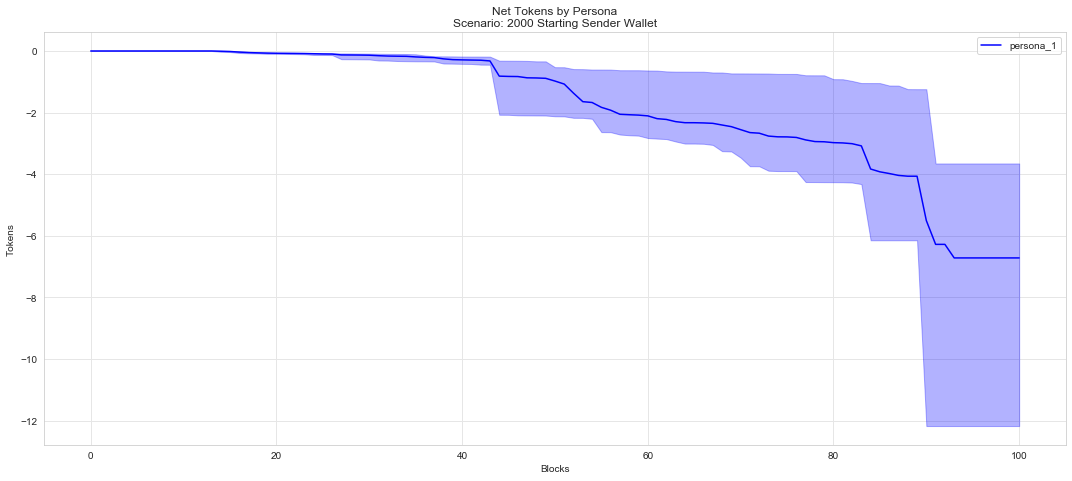

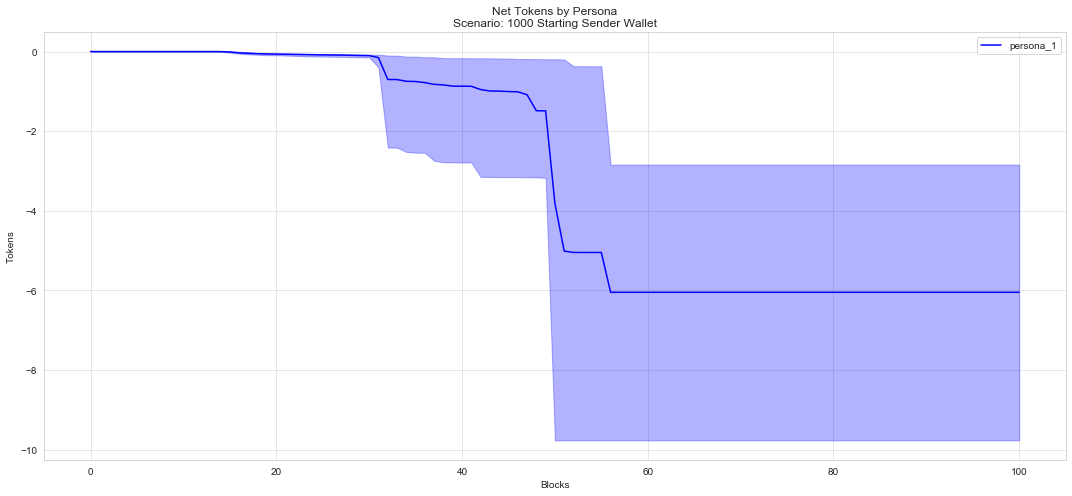

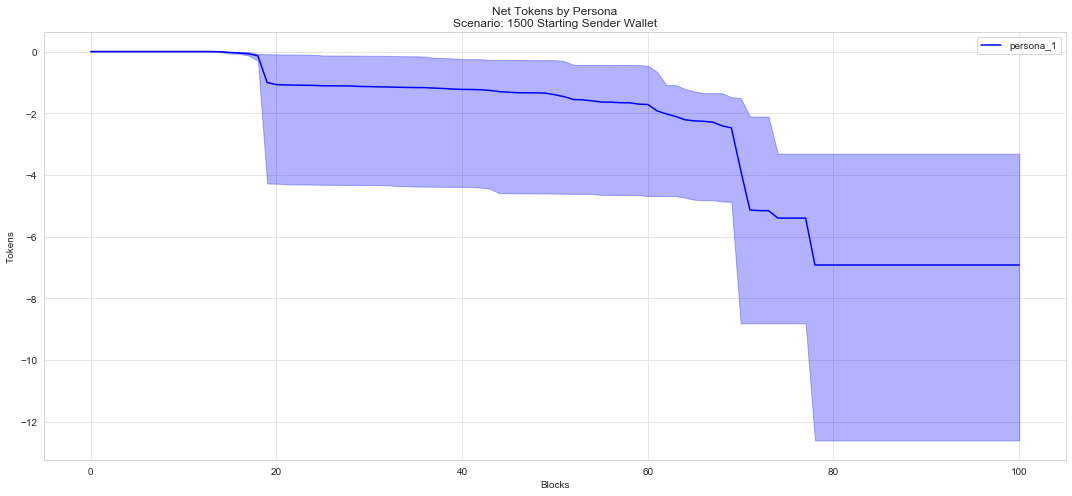

In [25]:
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)

persona_4 = Persona(0.05,0.3,0.25,0.2,0.2)
persona_4.apply_share(0.2,0.2,0.2, 0.2,0.2) 

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['j_wallet'] = df.network.apply(lambda x: np.array(x.nodes['j']['wallet']))
        df['r_wallet'] = df.network.apply(lambda x: np.array(x.nodes['r']['wallet']))
        df['p_wallet'] = df.network.apply(lambda x: np.array(x.nodes['p']['wallet']))
        df['k_wallet'] = df.network.apply(lambda x: np.array(x.nodes['k']['wallet']))
        df['i_wallet'] = df.network.apply(lambda x: np.array(x.nodes['i']['wallet']))

        df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        df['r_wallet'] = np.array(df.r_wallet,dtype = float)
        df['p_wallet'] = np.array(df.p_wallet,dtype = float)
        df['k_wallet'] = np.array(df.k_wallet,dtype = float)
        df['i_wallet'] = np.array(df.i_wallet,dtype = float)

#         df['persona_1'] = 
        
        df['persona_1'] = df.j_wallet * persona_1.receiving_role + df.r_wallet * persona_1.routing_role + df.k_wallet * persona_1.storing_role\
                    + df.p_wallet * persona_1.proving_role + df.i_wallet * persona_1.sending_role - df.i_wallet[0] * persona_1.sending_role
        
        
        df_persona_1 = df.groupby('timestep').agg({'persona_1': ['min', 'mean', 'max']}).reset_index()
#         df_r = df.groupby('timestep').agg({'r_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_p = df.groupby('timestep').agg({'p_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_k = df.groupby('timestep').agg({'k_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['AB_Test']
        ax = axs
        title = 'Net Tokens by Persona' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' #+ str(secondary_label*100)  + ' % Route Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

        ax.plot(df_persona_1.timestep, df_persona_1['persona_1']['mean'],color = colors[0], label='persona_1')
#         ax.plot(df_r.timestep, df_r['r_wallet']['mean'],color = colors[1],label='r_wallet')
#         ax.plot(df_p.timestep, df_p['p_wallet']['mean'],color = colors[2],label='p_wallet')
#         ax.plot(df_k.timestep, df_k['k_wallet']['mean'],color = colors[3],label='k_wallet')

        ax.legend()

        ax.fill_between(df_persona_1.timestep, df_persona_1[('persona_1','min')], df_persona_1[('persona_1','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        
#         ax.fill_between(df_r.timestep, df_r[('r_wallet','min')], df_r[('r_wallet','max')], alpha=0.3 ,color = colors[1],label='r_wallet')        
#         ax.fill_between(df_p.timestep, df_p[('p_wallet','min')], df_p[('p_wallet','max')], alpha=0.3 ,color = colors[2],label='p_wallet')        
#         ax.fill_between(df_k.timestep, df_k[('k_wallet','min')], df_k[('k_wallet','max')], alpha=0.3 ,color = colors[3],label='k_wallet')        
         
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

We see that applying the uniform share vector over this persona with a weighted role vector scales the token holdings uniformly.

#### Persona 5: Control, weighted distribution of activity with weighted market share

Finally, we take the persona with this persona with less of sending role and greater in storing and routing and we introduce variation to the distribution of share the persona plays across the network. 

$ Persona  = (\overrightarrow{\rho}, \overrightarrow{\sigma})$

$\overrightarrow{\rho} = \left[\begin{array}{ccccc} 0.05 & 0.3 & 0.25 & 0.2 & 0.2 \end{array} \right]$



| Send Activity    |  Store Activity | Route Activity     |  Receive Activity |  Prove Activity  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|5%    | 30%      | 25%      |20%      |20%      |


$\overrightarrow{\sigma} = \left[\begin{array}{ccccc} 0.05 & 0.3 & 0.25 & 0.2 & 0.2 \end{array} \right]$

| Send Share    |  Store Share | Route Share     |  Receive Share |  Prove Share  |
|:-------------:|:-------------:|:-------------:|:-----:|:-----:|
|5%    | 30%      | 25%      |20%      |20%      |

The plotted line depicts the mean value, averaged over the Monte Carlo runs. The band show the spread between the mininum and maximum values across Monte Carlo runs.

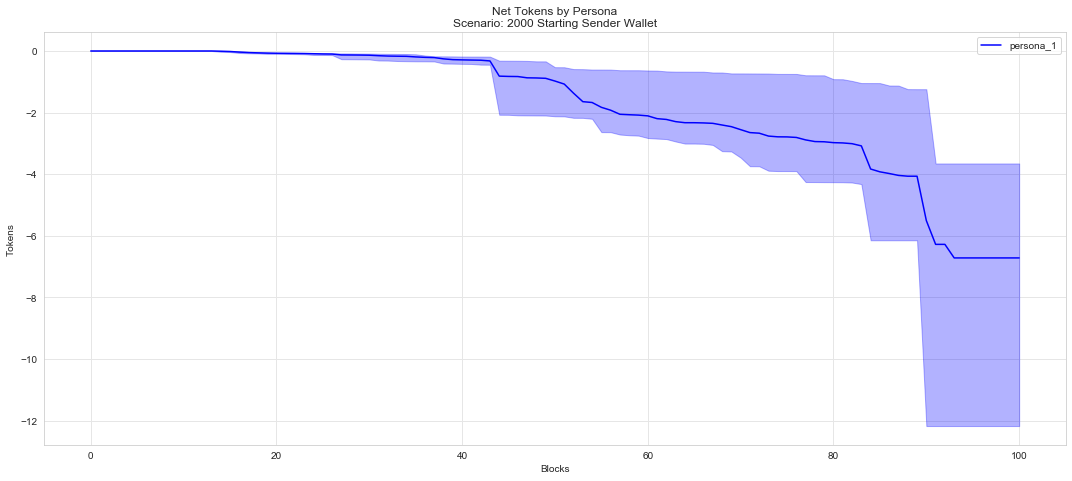

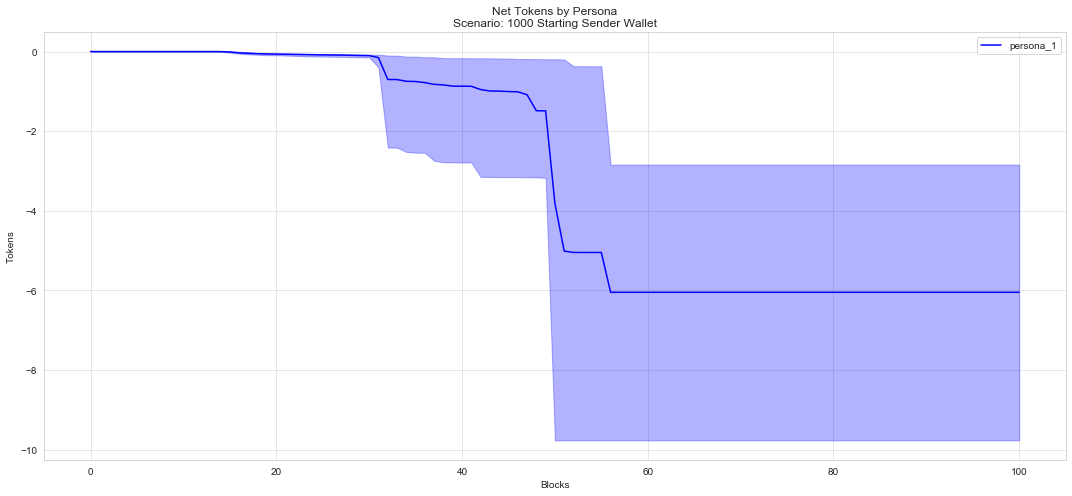

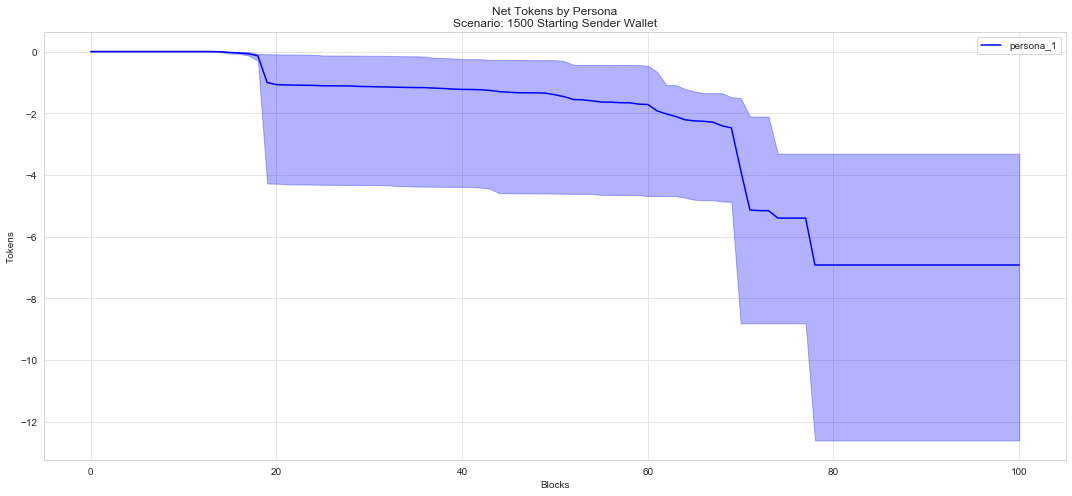

In [26]:
experiments = experiments.sort_values(by =['AB_Test', 'i_wallet']).reset_index(drop=True)

persona_5 = Persona(0.05,0.3,0.25,0.2,0.2)
persona_5.apply_share(0.05,0.3,0.25,0.2,0.2) 

cols = 1
rows = 1
cc_idx = 0

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['i_wallet']
    cc_label = experiments.iloc[cc_idx]['i_wallet']
    secondary_label = experiments.iloc[cc_idx]['route_allocation']
    sub_experiments = experiments[experiments['i_wallet']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['j_wallet'] = df.network.apply(lambda x: np.array(x.nodes['j']['wallet']))
        df['r_wallet'] = df.network.apply(lambda x: np.array(x.nodes['r']['wallet']))
        df['p_wallet'] = df.network.apply(lambda x: np.array(x.nodes['p']['wallet']))
        df['k_wallet'] = df.network.apply(lambda x: np.array(x.nodes['k']['wallet']))
        df['i_wallet'] = df.network.apply(lambda x: np.array(x.nodes['i']['wallet']))

        df['j_wallet'] = np.array(df.j_wallet,dtype = float)
        df['r_wallet'] = np.array(df.r_wallet,dtype = float)
        df['p_wallet'] = np.array(df.p_wallet,dtype = float)
        df['k_wallet'] = np.array(df.k_wallet,dtype = float)
        df['i_wallet'] = np.array(df.i_wallet,dtype = float)

#         df['persona_1'] = 
        
        df['persona_1'] = df.j_wallet * persona_1.receiving_role + df.r_wallet * persona_1.routing_role + df.k_wallet * persona_1.storing_role\
                    + df.p_wallet * persona_1.proving_role + df.i_wallet * persona_1.sending_role - df.i_wallet[0] * persona_1.sending_role
        
        
        df_persona_1 = df.groupby('timestep').agg({'persona_1': ['min', 'mean', 'max']}).reset_index()
#         df_r = df.groupby('timestep').agg({'r_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_p = df.groupby('timestep').agg({'p_wallet': ['min', 'mean', 'max']}).reset_index()
#         df_k = df.groupby('timestep').agg({'k_wallet': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['AB_Test']
        ax = axs
        title = 'Net Tokens by Persona' + '\n' + 'Scenario: ' + str(cc_label)  + ' Starting Sender Wallet' #+ str(secondary_label*100)  + ' % Route Allocation'
        ax.set_title(title)
        ax.set_ylabel('Tokens')
        colors = ['b','orange', 'g', 'r']

        ax.plot(df_persona_1.timestep, df_persona_1['persona_1']['mean'],color = colors[0], label='persona_1')
#         ax.plot(df_r.timestep, df_r['r_wallet']['mean'],color = colors[1],label='r_wallet')
#         ax.plot(df_p.timestep, df_p['p_wallet']['mean'],color = colors[2],label='p_wallet')
#         ax.plot(df_k.timestep, df_k['k_wallet']['mean'],color = colors[3],label='k_wallet')

        ax.legend()

        ax.fill_between(df_persona_1.timestep, df_persona_1[('persona_1','min')], df_persona_1[('persona_1','max')], alpha=0.3 ,color = colors[0],label='j_wallet')        
#         ax.fill_between(df_r.timestep, df_r[('r_wallet','min')], df_r[('r_wallet','max')], alpha=0.3 ,color = colors[1],label='r_wallet')        
#         ax.fill_between(df_p.timestep, df_p[('p_wallet','min')], df_p[('p_wallet','max')], alpha=0.3 ,color = colors[2],label='p_wallet')        
#         ax.fill_between(df_k.timestep, df_k[('k_wallet','min')], df_k[('k_wallet','max')], alpha=0.3 ,color = colors[3],label='k_wallet')        
         
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

Varying the share of the network that the persona plays according to each role allows the persona to achieve an even larger role as a prosumer, earning more tokens than the uniformly distibuted counterpart.

The development of personas offers the ability to strategize its activity and resource commitment as a result of network allocation decisions as well as maximizing its own profit based on its own costs.